In [4]:
import osmnx as ox
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import random as rd
from IPython.display import clear_output
from shapely.wkt import loads as load_wkt
import matplotlib.cm as cm
ox.config(log_console=True, use_cache=True)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


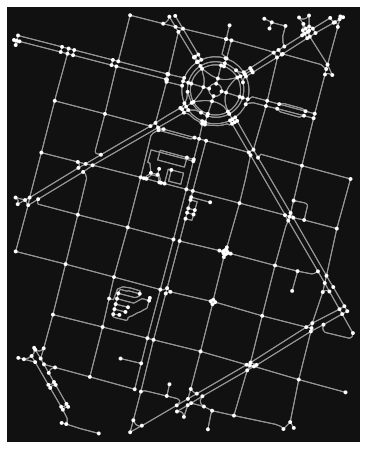

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_7804/4170554055.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['shortest_route_length_to_target'][node] = route_length
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\matplotlib\cbook\__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x =

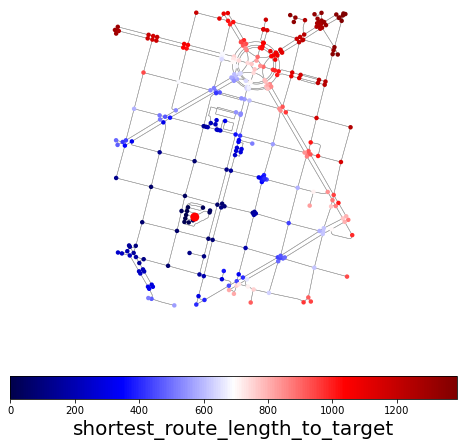

In [7]:
#mapa menor
G = ox.graph_from_bbox(-19.9209,-19.9312,-43.9505,-43.9415,network_type='walk')
#mapa completo
#G = ox.graph_from_bbox(-19.7961,-20.0056,-44.0418,-43.8684,network_type='walk')
fig, ax = ox.plot_graph(G)



coord_1 = (-19.92798671024853, -43.94740898668482)
target_1 = ox.get_nearest_node(G, coord_1)


nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)  # Transforms nodes and edges into Geodataframes

nodes['shortest_route_length_to_target'] = 0
route_lengths = []


for u, v, k, data in G.edges(data=True, keys=True):
    #print(u,v,k,data['length'])
    data['time'] = data['length']
    
    
for node in G.nodes:
    try:
        route_length = nx.shortest_path_length(G, node, target_1, weight='time')
        route_lengths.append(route_length)
        nodes['shortest_route_length_to_target'][node] = route_length

    except nx.exception.NetworkXNoPath:
        continue

        
def get_colors(n, cmap='seismic', start=0., stop=1.):

    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, 1) for r, g, b, _ in colors]
    return colors

def get_node_colors_by_attr(G, attr, cmap='seismic', start=0, stop=1, na_color='none'):

    #num_bins = len(G.nodes())
    num_bins = 100
    
    bin_labels = range(num_bins)
    
    attr_values = pd.Series(nodes[attr].values)  # Cretaes a dataframe ith the attribute of each node
    
    cats = pd.qcut(x=attr_values, q=num_bins, labels=bin_labels)  # Puts the values in bins
    
    colors = get_colors(num_bins, cmap, start, stop)  #List of colors of each bin
    node_colors = [colors[int(cat)] if pd.notnull(cat) else na_color for cat in cats]

    return node_colors


nc = get_node_colors_by_attr(G, attr='shortest_route_length_to_target')
ns = [80 if node == target_1 else 20 for node in G.nodes()]
k = 0


for node in G.nodes():

    if node == target_1:

        nc[k] = str('red')
        k += 1
    else:
        k += 1
        
#G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)
cmap = plt.cm.get_cmap('seismic')
norm=plt.Normalize(vmin=nodes['shortest_route_length_to_target'].min(), vmax=nodes['shortest_route_length_to_target'].max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
cb.set_label('shortest_route_length_to_target', fontsize = 20)
fig.savefig('demo.png')